In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

#train_data = pd.read_csv("../input/train.csv") #reading the csv files using pandas
#test_data = pd.read_csv("../input/test.csv")

In [70]:
X[0,:].shape

(784,)

5


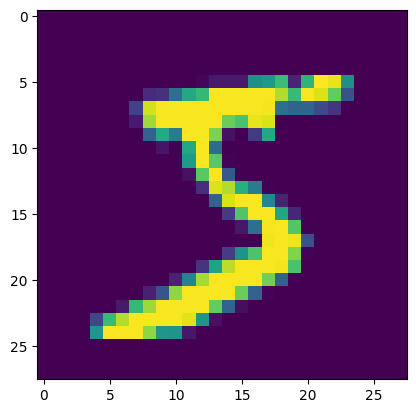

In [71]:
plt.imshow(X[0,:].reshape(28,28))
print(y[0])

In [72]:
np.unique(X[0,:])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=int64)

In [73]:
X = X/255.0

### Q1
whiten the data using function from sklearn.preprocessing
whiten is mean 0 and var 1

In [74]:
# whiten the data 
from sklearn.preprocessing import scale

X_scaled = scale(X)

In [75]:
squarer = lambda t: int(t)
vfunc = np.vectorize(squarer)
y = vfunc(y)

In [76]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [77]:
X.shape

(70000, 784)

In [83]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [78]:
#Fill in
def train_and_test_split(X,y):
    tr_index = []
    te_index = []
    for i in range(10):
        perm = np.random.permutation(np.where(y==i)[0])
        p = int(np.round(len(perm)*0.7))
        tr_index.extend(perm[:p])
        tr_index.extend(perm[p+1:])
    tr_index = np.random.permutation(tr_index)
    te_index = np.random.permutation(te_index)
    X_train = X[tr_index,:]
    y_train = y[tr_index]
    X_test = X[te_index,:]
    y_test = y[te_index]
    return X_train,y_train,X_test,y_test


In [81]:
X_train,y_train,X_test,y_test = train_and_test_split(X_scaled,y)

# X_train,y_train,X_test,y_test = train_test_split(X)

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
plt.imshow(X_train[0,:].reshape(28,28))
print(y_train[0])

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

In [ ]:
y_pred = model_linear.predict(X_test)

In [ ]:
plt.imshow(X_test[10,:].reshape(28,28))
print(y_test[10],y_pred[10])

In [ ]:
np.count_nonzero(y_pred!=y_test)

### Q2
use sklearn.metrics to get accuracy score and confusion matrix 

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [ ]:
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

### Q3
Use PCA from sklearn.decomposition to reduce dimensionality of feature space.
reduce to 256 features
and then train and do evaluation

In [ ]:
from sklearn.decomposition import PCA